In [1]:
!pip install qutip

import matplotlib.pyplot as plt
import numpy as np
import qutip
import defs
import helpers_qutip

# QuTip Settings
qutip.settings.num_cpus = 4

# Helper Functions
def extract_expect_op_trajectory(result_sme, expect_op):
    return np.array( [qutip.expect(expect_op, _rho) for _rho in result_sme.states] )    

def plot_trajectories(time, trajectories, ylabel = '$<\sigma_z>$'):
    fig, ax = plt.subplots(figsize=(6,4))
    for trajectory in trajectories:
        ax.plot(time, trajectory)
        ax.set_ylim([-1, 1])
        ax.set_xlabel('Time ($\mu$s)')
        ax.set_ylabel(ylabel)

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


# Generate Training/Validation/Test Sets

In [2]:
# load QuTip definitions
p = defs.get_parameters(num_sites=1, num_fock=[5])
ops = helpers_qutip.Operators(p, swap_tensor_order=True)
hamiltonian = defs.get_hamiltonian(p, ops)    
c_ops = defs.get_collapse_operators(p, ops)

# time-evolution
state_plus_z  = defs.get_initial_state(p, state_qb='+z_tilde')
state_minus_z = defs.get_initial_state(p, state_qb='-z_tilde')
n_traj = 50

# trajectories
result_sme_plus_z = helpers_qutip.solve_time_evolution_trajectories(p,
                                                                    hamiltonian,
                                                                    state_plus_z, 
                                                                    c_ops=[],#[c_ops[1]],
                                                                    sc_ops=[c_ops[0]],
                                                                    ntraj = n_traj,
                                                                    nsubsteps=p.nsubsteps)

result_sme_minus_z = helpers_qutip.solve_time_evolution_trajectories(p,
                                                                    hamiltonian,
                                                                    state_minus_z, 
                                                                    c_ops=[],#[c_ops[1]],
                                                                    sc_ops=[c_ops[0]],
                                                                    ntraj = n_traj,
                                                                    nsubsteps=p.nsubsteps)


# Extract \sigma_z(t) trajectories from SME solution
trajectory_time = p.times
z_plus_sigma_z =  extract_expect_op_trajectory(result_sme_plus_z, ops.Sz[0]) 
z_minus_sigma_z = extract_expect_op_trajectory(result_sme_minus_z, ops.Sz[0]) 
np.save('datasets/trajectory_time.npy', trajectory_time)
np.save('datasets/z_plus_sigma_z.npy',  z_plus_sigma_z)
np.save('datasets/z_minus_sigma_z.npy', z_minus_sigma_z)

# Extract r(t) trajectories from SME solution
z_plus_r_t  = result_sme_plus_z.measurement
z_minus_r_t = result_sme_minus_z.measurement
np.save('datasets/z_plus_r_t.npy',  z_plus_r_t)
np.save('datasets/z_minus_r_t.npy', z_minus_r_t)

10.0%. Run time:   2.15s. Est. time left: 00:00:00:19
20.0%. Run time:   4.25s. Est. time left: 00:00:00:17
30.0%. Run time:   6.31s. Est. time left: 00:00:00:14
40.0%. Run time:   8.40s. Est. time left: 00:00:00:12
50.0%. Run time:  10.63s. Est. time left: 00:00:00:10
60.0%. Run time:  12.68s. Est. time left: 00:00:00:08
70.0%. Run time:  14.84s. Est. time left: 00:00:00:06
80.0%. Run time:  17.03s. Est. time left: 00:00:00:04
90.0%. Run time:  19.15s. Est. time left: 00:00:00:02
Total run time:  21.25s
10.0%. Run time:   2.12s. Est. time left: 00:00:00:19
20.0%. Run time:   4.32s. Est. time left: 00:00:00:17
30.0%. Run time:   6.41s. Est. time left: 00:00:00:14
40.0%. Run time:   8.61s. Est. time left: 00:00:00:12
50.0%. Run time:  10.80s. Est. time left: 00:00:00:10
60.0%. Run time:  12.90s. Est. time left: 00:00:00:08
70.0%. Run time:  15.00s. Est. time left: 00:00:00:06
80.0%. Run time:  17.22s. Est. time left: 00:00:00:04
90.0%. Run time:  19.53s. Est. time left: 00:00:00:02
Tota

In [ ]:
# can also load datasets from disk if they exist
trajectory_time = np.load('datasets/trajectory_time.npy')
z_plus_sigma_z = np.load('datasets/z_plus_sigma_z.npy')
z_minus_sigma_z = np.load('datasets/z_minus_sigma_z.npy')
z_plus_r_t = np.load('datasets/z_plus_r_t.npy')
z_minus_r_t = np.load('datasets/z_minus_r_t.npy')

(5000, 501)


## Generate Figures for Report

### r(t) for |0&gt; and |1&gt;

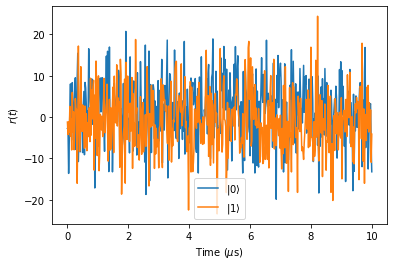

In [3]:
# plot the measurement signal vs timesteps
plt.plot(trajectory_time, np.real(z_plus_r_t[0]),  label = r'$| 0 \rangle $')  
plt.plot(trajectory_time, np.real(z_minus_r_t[1]), label = r'$| 1 \rangle $')  
plt.xlabel('Time ($\mu$s)')
plt.ylabel('$r(t)$')
plt.legend()
plt.savefig('figures/r_t.png')
plt.show()

### Integrated r(t) for |0&gt; and |1&gt;

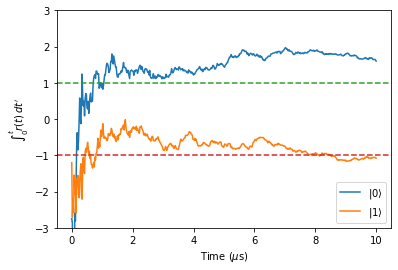

In [14]:
# get integrated "r(t)" for a single trajectory
plt.plot(trajectory_time, np.real(np.cumsum(z_plus_r_t[0])/np.arange(1, len(z_plus_r_t[0])+1)), label = r'$| 0 \rangle $')
plt.plot(trajectory_time, np.real(np.cumsum(z_minus_r_t[1])/np.arange(1, len(z_minus_r_t[1])+1)), label = r'$| 1 \rangle $')
plt.axhline(y= 1.0, color='tab:green', linestyle='dashed')
plt.axhline(y=-1.0, color='tab:red',   linestyle='dashed')
plt.ylim(-3,3)
plt.xlabel('Time ($\mu$s)')
plt.ylabel("$\int_{0}^{t} r(t) \,dt'$")
plt.legend()
plt.savefig('figures/int_r_t.png')
plt.show()

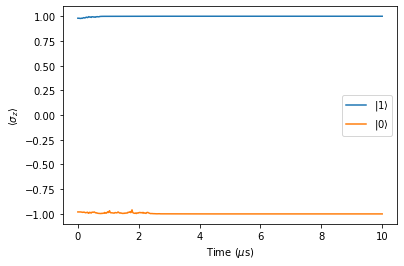

In [15]:
# plot \sigma_z for the same density matrix as above
plt.plot(trajectory_time, np.real(z_plus_sigma_z[0]), label = r'$| 1 \rangle $')
plt.plot(trajectory_time, np.real(z_minus_sigma_z[1]), label = r'$| 0 \rangle $')
plt.xlabel('Time ($\mu$s)')
plt.ylabel(r'$\langle \sigma_z \rangle$')
plt.legend()
plt.savefig('figures/int_r_t.png')
plt.show()

### All the r(t)'s prepared in |1&gt;, try to find one that T1's

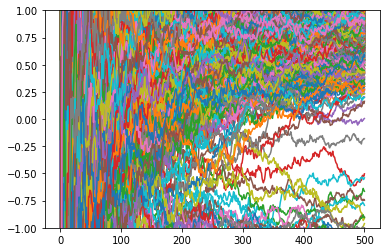

In [ ]:
for r in z_minus_r_t:
    #r is complex but has an incredibly small imaginary component, so we just take the real component here
    plt.plot(np.cumsum(np.real(r))/np.arange(1, len(r)+1))
plt.ylim(-1,1)
plt.show()

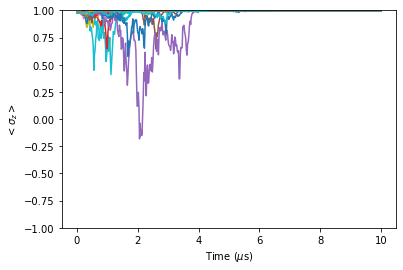

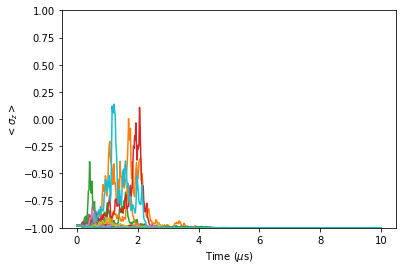

In [16]:
plot_trajectories(trajectory_time, z_plus_sigma_z)
plot_trajectories(trajectory_time, z_minus_sigma_z)

# Classify with One-Box Method

one box means


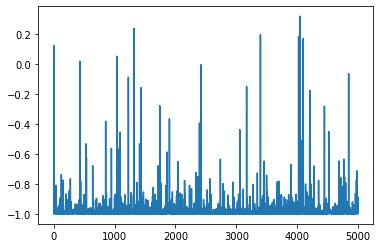

a sigma measurement for a boi that had a T1


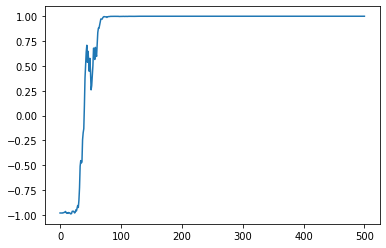

and the measurement curve that made it
/shared-libs/python3.7/py/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


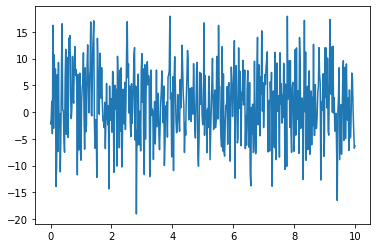

with a badness of 0.19454888704686327


IndexError: index 501 is out of bounds for axis 0 with size 501

In [ ]:
skip_time = 40e-9 * 1e6 # in us
integration_time = 2e-6 * 1e6

def single_box_classifier(time, trajectories, skip_time, integration_time):
    # extract points after skip time, but before integration time is complete
    integration_start = np.argmax(time >= skip_time)
    integration_end = np.argmin(time <= (skip_time + integration_time))
    #valid_times = time[integration_start:integration_end]
    valid_trajectories = trajectories[:, integration_start:integration_end]

    return valid_trajectories.mean(axis=1)

one_box_means = single_box_classifier(trajectory_time, z_plus_sigma_z, skip_time, integration_time)
print('one box means')
plt.plot(one_box_means)
plt.show()

print('a sigma measurement for a boi that had a T1')
boi = np.argsort(one_box_means)[-3]
plt.plot(z_plus_sigma_z[boi])
plt.show()

print('and the measurement curve that made it')
plt.plot(trajectory_time, z_plus_r_t[boi])
plt.show()

print(f'with a badness of {one_box_means[boi]}')


# Extract ground and excited states, plot them
z_minus_states = []
z_plus_states = []
for i, mean in enumerate(one_box_means):
    if(mean < 0):
        z_minus_states.append(r_z_plus[i])

    else:
        z_plus_states.append(r_z_plus[i])

z_plus_states = np.array(z_plus_states)
z_minus_states = np.array(z_minus_states)

#plot_trajectories(trajectory_time, z_plus_states))
#plot_trajectories(trajectory_time, z_minus_states)        

# Classify with Two-Box Method

5000 trajectories in simulation
0 trajectories in z_plus
5000 trajectories in z_minus
0 trajectories in misc


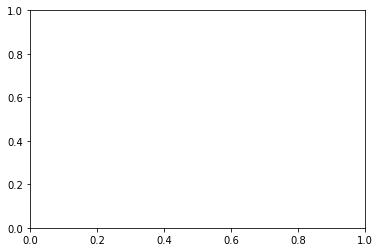

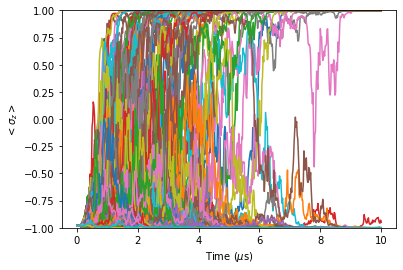

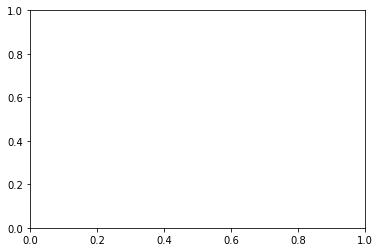

In [ ]:
def double_box_classifier(time, trajectories, skip_time, integration_time):
    # extract points after skip time, but before integration time is complete
    integration_start = np.argmax(time >= skip_time)
    integration_end = np.argmin(time <= (skip_time + integration_time))
    #valid_times = time[integration_start:integration_end]
    valid_trajectories = trajectories[:, integration_start:integration_end]

    # compute windowed averages
    midpoint = valid_trajectories.shape[1]//2
    first_half =  valid_trajectories[:, :midpoint]
    second_half = valid_trajectories[:, midpoint:]


    return np.array([first_half.mean(axis=1), second_half.mean(axis=1)])

two_box_means = double_box_classifier(trajectory_time, z_plus_sigma_z, skip_time, integration_time)
box_one_means = two_box_means[0]
box_two_means = two_box_means[1]

z_minus_states = []
z_plus_states = []
misc_states = []

for i in range(box_one_means.shape[0]):
    if( (box_one_means[i] >= 0) and (box_one_means[i] >= 0) ):
        z_plus_states.append(z_plus_sigma_z[i])
    
    elif( (box_one_means[i] <= 0) and (box_one_means[i] <= 0) ):
        z_minus_states.append(z_plus_sigma_z[i])
    
    else:
        misc_states.append(z_plus_sigma_z[i])

z_plus_states = np.array(z_plus_states)
z_minus_states = np.array(z_minus_states)
misc_states = np.array(misc_states)

plot_trajectories(trajectory_time, z_plus_states)
plot_trajectories(trajectory_time, z_minus_states)
plot_trajectories(trajectory_time, misc_states)

print(f"{z_plus_sigma_z.shape[0]} trajectories in simulation")
print(f"{z_plus_states.shape[0]} trajectories in z_plus")
print(f"{z_minus_states.shape[0]} trajectories in z_minus")
print(f"{misc_states.shape[0]} trajectories in misc")

# Classify with Multi-Layer Perceptron

In [ ]:
# https://scikit-learn.org/stable/modules/neural_networks_supervised.html

from sklearn.neural_network import MLPClassifier
#classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, random_state=1)
X = np.vstack((z_plus_states, z_minus_states))
Y = np.concatenate((np.ones(z_plus_states.shape[0]), -np.ones(z_minus_states.shape[0])))

classifier.fit(X,Y)

MLPClassifier(alpha=1e-05, random_state=1, solver='lbfgs')

In [ ]:
classifier.predict([z_minus_states[4]])

array([-1.])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0211f19d-54e4-44e5-ab1c-ce7a6a2d44df' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>